In [1]:
import keras 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#boston realestate price dataset

from keras.datasets import boston_housing 
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()


57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
mean=train_data.mean(axis=0) #to use the standard scaling to analyse data
#axis=0>> in horizontal direction
#axis=1>> in vertical direction 

In [6]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [7]:
train_data-=mean #trai_data=train_data-mean

In [8]:
#standard of deviation 
std=train_data.std(axis=0) #std>>standard deviation 

In [9]:
train_data/=std #train_data=train_data/std

train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
mean=test_data.mean(axis=0)
test_data-=mean
std=test_data.std(axis=0)
test_data/=std

In [11]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [12]:
#creating artifical neural network 

from keras import models
from keras import layers

def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64,activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])
  return model

  

In [13]:
#K-folder verificaiton 

k=4

num_val_samples=len(train_data)//k #// >> getting rid of the remainder
print(num_val_samples)

101


In [14]:
k=4

num_val_samples=len(train_data)//k #the size of the folder
all_scores=[] 

for i in range(k):
  print('the following fold # is:',i)

  #preparing verification data: kth divison
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples] 
  val_labels=train_labels[i*num_val_samples:(i+1)*num_val_samples]

  #preparing the test data:
  partial_train_data=np.concatenate(
    [train_data[:i*num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
  #preparing the label data:
  partial_train_labels=np.concatenate(
    [train_labels[:i*num_val_samples],
    train_labels[(i+1)*num_val_samples:]],
    axis=0)
  
  model = build_model()
  model.fit(partial_train_data,
            partial_train_labels,
            epochs=20,
            batch_size=1,
            verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_labels, verbose=0)
  all_scores.append(val_mae)

the following fold # is: 0
the following fold # is: 1
the following fold # is: 2
the following fold # is: 3


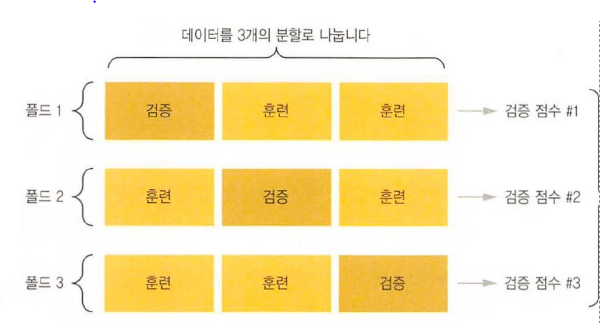

In [15]:
all_scores

[2.025988817214966, 2.418016195297241, 2.399784564971924, 2.5520870685577393]

In [16]:
np.mean(all_scores)

2.3489691615104675

In [17]:
#K-folder verification 
k=4
num_epochs = 500
num_val_samples=len(train_data)//k #the size of the folder
all_scores=[] 

for i in range(k):
  print('the following fold # is:',i)

  #preparing verification data: kth divison
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples] 
  val_labels=train_labels[i*num_val_samples:(i+1)*num_val_samples]

  #preparing the test data:
  partial_train_data=np.concatenate(
    [train_data[:i*num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
  #preparing the label data:
  partial_train_labels=np.concatenate(
    [train_labels[:i*num_val_samples],
    train_labels[(i+1)*num_val_samples:]],
    axis=0)
  
  model = build_model()
  history=model.fit(partial_train_data,
            partial_train_labels,
            epochs=num_epochs,
            batch_size=1,
            validation_data=(val_data,val_labels),
            verbose=0)
  mae_history=history.history['mae']
  all_scores.append(mae_history)

the following fold # is: 0
the following fold # is: 1
the following fold # is: 2
the following fold # is: 3


Text(0, 0.5, 'Validation MAE')

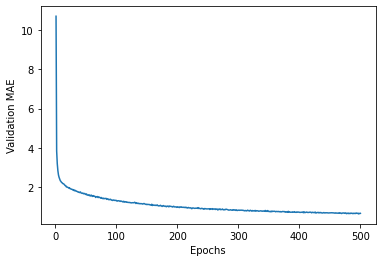

In [18]:
average_mae_history=[np.mean([x[i] for x in all_scores])for i in range(num_epochs)]
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
